<a href="https://colab.research.google.com/github/andressamiwa/MachineLearning/blob/master/Algoritmos_de_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparação de modelos de algoritmos de predição|
Exemplo de algoritmo não supervisionado utilizando o K-Means

In [1]:
#importando bibliotecas
from pandas import DataFrame 
import matplotlib.pyplot as plt

In [2]:
#criando conjunto de dados
dados = {'x':[25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,43,52,68,54,35,87,45,23,8,4,35,1,76,54],
         'y':[79,51,53,78,59,74,45,7,12,4,67,45,76,56,56,34,21,67,4,3,56,78,21,45,87,56,3,12,43,56]}

In [3]:
#criando o dataframe
df = DataFrame(dados,columns=['x','y'])
print(df.head())

    x   y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


In [4]:
#biblioteca para construir o algoritmo
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=2) #encontra dois clusters
kmeans.fit(df) #aplica o algoritmo
centroids = kmeans.cluster_centers_ #encontra as coordenadas dos centroides
print(centroids)

[[40.75 61.35]
 [39.4  12.1 ]]


Text(0, 0.5, 'Y')

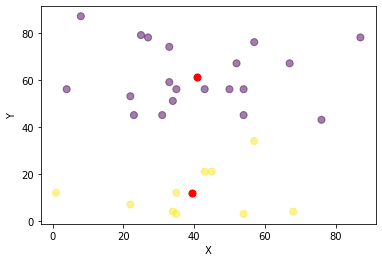

In [6]:
#aplicando vizualizacao do gráfico de saida
plt.scatter(df['x'],df['y'],c=kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=50)
plt.xlabel("X")
plt.ylabel("Y")

Exemplo de algoritmo supervisionado-KNN

In [7]:
#bibliotecas para implementacao do modelo KNN
import pylab as pl #utilizado para plotar os gráficos
from sklearn import neighbors,datasets
import pandas as pd
import numpy as np

In [8]:
#criando a rotina para utilizar o dataset iris
iris = datasets.load_iris()

In [9]:
df_iris = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])

In [10]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [11]:
#transformando os dados em array
X = df_iris.iloc[:,:-1].values #dados de entrada
y = df_iris.iloc[:,4].values #saidas ou targets

In [12]:
#dividindo os dados em treinamento e teste
from sklearn.model_selection import train_test_split #funcao que realiza a divisao do dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2) #apenas 20% dos meus dados para teste


In [13]:
#realizacao da normalizacao dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [14]:
#treinando o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
#realizando a predição
y_pred = classifier.predict(X_test)

In [16]:
#construindo a matriz de confusao para analisar o modelo criado
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  0 10]
 [ 0  0 13]
 [ 0  0  7]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00        13
         2.0       0.23      1.00      0.38         7

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


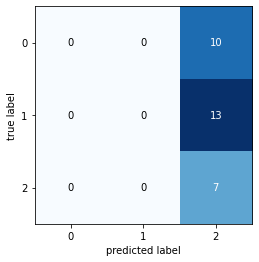

In [17]:
#plotando a matriz de confusao
matriz_confusao=confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Exemplo de algoritmo supervisionado - Árvore de decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [20]:
clf = DecisionTreeClassifier()
#realiza o treinamento do modelo
clf.fit(X_train,y_train)
#previsao do classificador
pred = clf.predict(X_test)

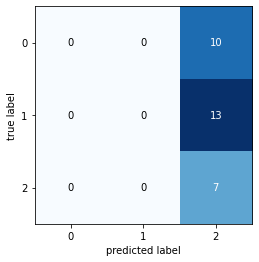

In [21]:
#plotando a matriz de confusao
matriz_confusao=confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [22]:
#vizualizacao da arvore de decisao
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
#importa a arvore de decisao para o DB iris
dot_data = StringIO
export_graphviz(clf,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

Exemplo de algoritmo SUpervisionado - SVM

In [27]:
from sklearn.svm import SVC

In [28]:
clf = SVC(gamma='auto') 

In [29]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(X_test)

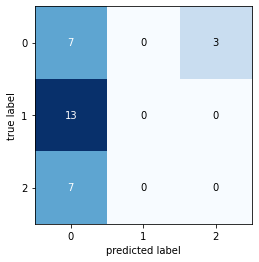

In [31]:
#plotando a matriz de confusao
matriz_confusao=confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Exemplo com rede neurais

In [32]:
from sklearn.neural_network import MLPClassifier

In [34]:
#define a configuração da rede
clf = MLPClassifier(solver = 'lbfgs',alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)

In [35]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
y_pred = clf.predict(X_test)

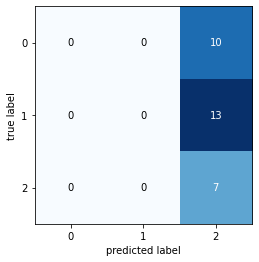

In [37]:
#plotando a matriz de confusao
matriz_confusao=confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()